# MVP Report

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import os
import requests
from requests import get
from os import path
from bs4 import BeautifulSoup

import json
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from typing import Dict, List, Optional, Union, cast
from env import github_token, github_username
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

import acquire as ac
import prepare

import warnings
warnings.filterwarnings("ignore")

# Acquire

#### For this project, you will have to build a dataset yourself. Decide on a list of GitHub repositories to scrape, and write the python code necessary to extract the text of the README file for each page, and the primary language of the repository.

#### Which repositories you use are up to you, but you should include at least 100 repositories in your data set.

In [2]:
url = 'https://github.com/search?o=desc&p={num}&q=OpenCV&s=stars&type=Repositories'
response = requests.get(url)

In [3]:
urls = ac.get_all_urls() 

In [4]:
urls

['oarriaga/face_classification',
 'openframeworks/openFrameworks',
 'vipstone/faceai',
 'PySimpleGUI/PySimpleGUI',
 'opencv/opencv_contrib',
 'Hironsan/BossSensor',
 'CMU-Perceptual-Computing-Lab/openpose',
 'opencv/opencv',
 'Ewenwan/MVision',
 'spmallick/learnopencv',
 'peterbraden/node-opencv',
 'bijection/sistine',
 'kelaberetiv/TagUI',
 'nuno-faria/tiler',
 'justadudewhohacks/opencv4nodejs',
 'bytedeco/javacv',
 'hamuchiwa/AutoRCCar',
 'jrosebr1/imutils',
 'hybridgroup/gocv',
 'esimov/pigo',
 'MasteringOpenCV/code',
 'Roujack/mathAI',
 'amusi/AI-Job-Notes',
 'makelove/OpenCV-Python-Tutorial',
 'CodecWang/OpenCV-Python-Tutorial',
 'mapillary/OpenSfM',
 'HuTianQi/SmartOpenCV',
 'shimat/opencvsharp',
 'anandpawara/Real_Time_Image_Animation',
 'soruly/trace.moe',
 'tebelorg/RPA-Python',
 'opentrack/opentrack',
 'nagadomi/lbpcascade_animeface',
 'abhiTronix/vidgear',
 'oreillymedia/Learning-OpenCV-3_examples',
 'ivanseidel/Is-Now-Illegal',
 'skvark/opencv-python',
 'kongqw/OpenCVForAnd

In [5]:
df = pd.read_json('data.json')

In [6]:
# 150 repos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [7]:
df

,repo,language,readme_contents
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...
...,...,...,...
245,jerry-git/thug-memes,Python,Thug Memes\n==========\n|build|\n|pypi|\n|pyth...
246,mesutpiskin/computer-vision-guide,Python,English | [Türkçe](./README.md)\n\n\n[![Gitter...
247,atilimcetin/guided-filter,C++,# Guided filter for OpenCV\n\nGuided filter is...
248,pablosproject/iPhone-OCR-Tesseract-and-OpenCV,Objective-C,iPhone-OCR-Tesseract-and-OpenCV\n=============...


# Prepare

In [8]:
language_count = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
language_count.columns = ['n', 'percent']
language_count

,n,percent
Python,101,0.415638
C++,79,0.325103
Java,16,0.065844
Jupyter Notebook,10,0.041152
JavaScript,7,0.028807
C#,5,0.020576
Shell,3,0.012346
Objective-C,3,0.012346
Go,3,0.012346
HTML,2,0.008230


In [9]:
df['text_cleaned'] = df.readme_contents.apply(prepare.basic_clean)
df['text_tokenized'] = df.text_cleaned.apply(prepare.tokenize)
df['text_lemmatized'] = df.text_tokenized.apply(prepare.lemmatize)
df['text_filtered'] = df.text_lemmatized.apply(prepare.remove_stopwords)
df.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...


In [10]:
# (a|b)
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

df.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor..."
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz..."


### Train, Validate, Test

In [13]:
main_two = df[(df.language == 'Python') | (df.language == 'C++')].copy()
main_two.language.value_counts()

Python    101
C++        79
Name: language, dtype: int64

In [14]:
train_validate, test = train_test_split(main_two.copy(), test_size=.2)
train, validate = train_test_split(train_validate.copy(), test_size=.25)

In [15]:
print(train.shape, validate.shape, test.shape)

(108, 8) (36, 8) (36, 8)


In [16]:
print(train.language.value_counts(), '\n')
print(validate.language.value_counts(), '\n')
print(test.language.value_counts())

Python    63
C++       45
Name: language, dtype: int64 

Python    19
C++       17
Name: language, dtype: int64 

Python    19
C++       17
Name: language, dtype: int64


# Explore

### What are the most common words in READMEs?   

### Single Most Common Words

In [17]:
python_words = ' '.join(df[df.language=='Python'].text_filtered)
c_plus_plus_words = ' '.join(df[df.language=='C++'].text_filtered)
all_words = ' '.join(df.text_filtered)

python_words = re.sub(r'\s.\s', '', python_words)
c_plus_plus_words = re.sub(r'\s.\s', '', c_plus_plus_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [18]:
python_freq = pd.Series(python_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

image     1420
&#9;      1085
opencv    1081
using      651
python     645
dtype: int64

In [19]:
word_counts = (pd.concat([all_freq, python_freq, c_plus_plus_freq], axis=1, sort=True)
               .set_axis(['All', 'Python', 'C++'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='All', ascending=False).head(10)

,All,Python,C++
image,1420,844,246
&#9;,1085,178,550
opencv,1081,266,322
using,651,247,189
python,645,449,62
build,644,46,266
file,637,269,148
use,574,200,175
face,560,239,77
install,551,225,102


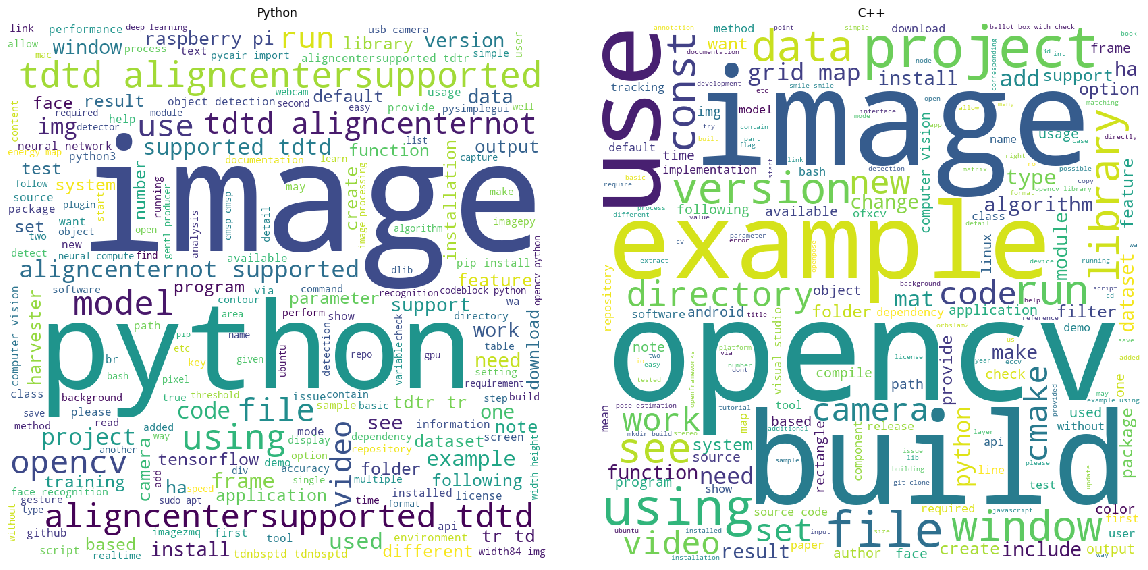

In [20]:
python_cloud = WordCloud(background_color='white',
                      height=800, width=800).generate(python_words)

c_plus_plus_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(c_plus_plus_words)

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(python_cloud)
axs[1].imshow(c_plus_plus_cloud)

axs[0].set_title('Python')
axs[1].set_title('C++')

for ax in axs: ax.axis('off')

### Most Common Bigrams

In [21]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...","[(openframeworkshttpopenframeworkscc, openfram..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor...","[(repository, opencvs), (opencvs, extra), (ext..."
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,...","[(repository, deprecated), (deprecated, tf20),..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra...","[(opencv, open), (open, source), (source, comp..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz...","[(mvision, machine), (machine, vision), (visio..."


In [22]:
python_bigrams = pd.Series(list(nltk.ngrams(python_words.split(), 2))).value_counts().head(20) 
c_plus_plus_bigrams = pd.Series(list(nltk.ngrams(c_plus_plus_words.split(), 2))).value_counts().head(20)

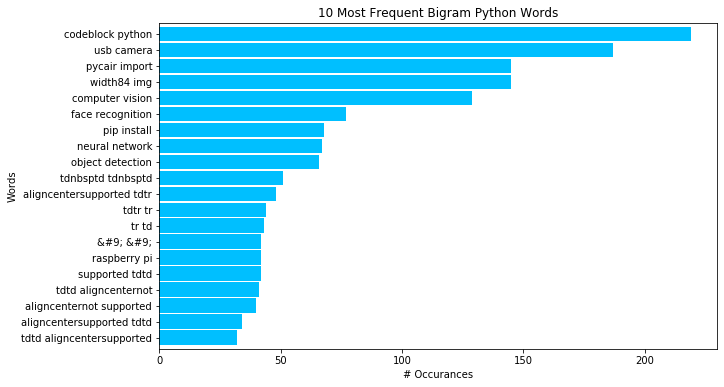

In [23]:
python_bigrams.sort_values(ascending=True).plot.barh(color='deepskyblue', width=.9, figsize=(10, 6))

plt.title('10 Most Frequent Bigram Python Words')
plt.ylabel('Words')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

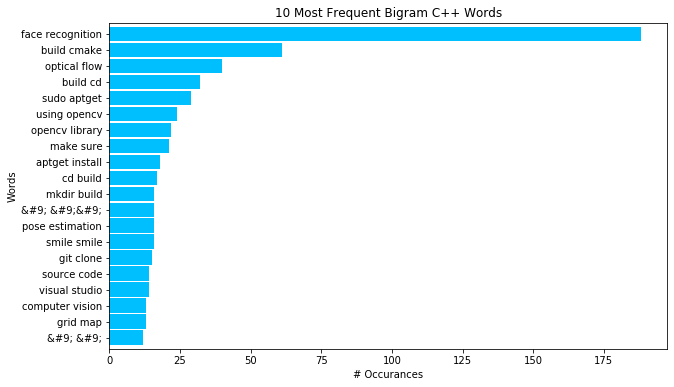

In [24]:
c_plus_plus_bigrams.sort_values(ascending=True).plot.barh(color='deepskyblue', width=.9, figsize=(10, 6))

plt.title('10 Most Frequent Bigram C++ Words')
plt.ylabel('Words')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = c_plus_plus_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

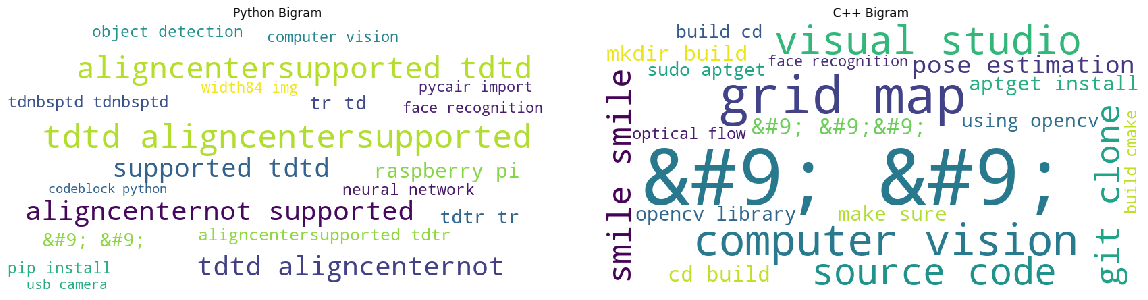

In [25]:
python_data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
c_plus_plus_data = {k[0] + ' ' + k[1]: v for k, v in c_plus_plus_bigrams.to_dict().items()}

python_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(python_data)

c_plus_plus_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(c_plus_plus_data)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(python_bigram_cloud)
axs[1].imshow(c_plus_plus_bigram_cloud)

axs[0].set_title('Python Bigram')
axs[1].set_title('C++ Bigram')

for ax in axs: ax.axis('off')

### Most Common Trigrams

In [26]:
python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3))).value_counts().head(20)
c_plus_plus_trigrams = pd.Series(list(nltk.ngrams(c_plus_plus_words.split(), 3))).value_counts().head(20)

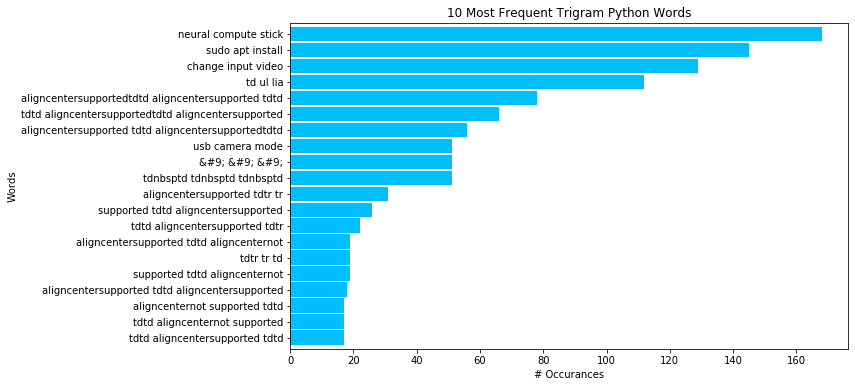

In [27]:
python_trigrams.sort_values(ascending=True).plot.barh(color='deepskyblue', width=.9, figsize=(10, 6))

plt.title('10 Most Frequent Trigram Python Words')
plt.ylabel('Words')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = python_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

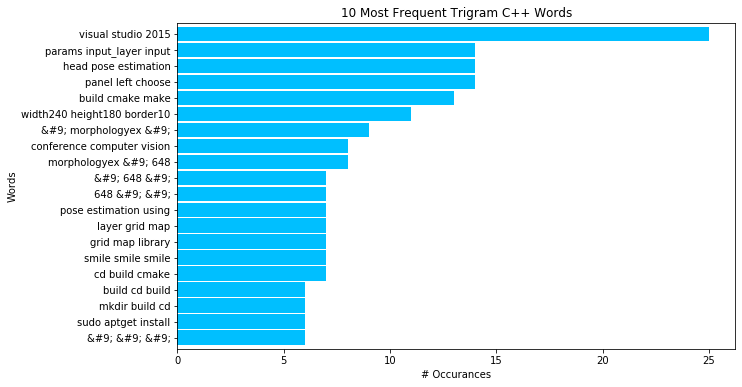

In [28]:
c_plus_plus_trigrams.sort_values(ascending=True).plot.barh(color='deepskyblue', width=.9, figsize=(10, 6))

plt.title('10 Most Frequent Trigram C++ Words')
plt.ylabel('Words')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = c_plus_plus_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

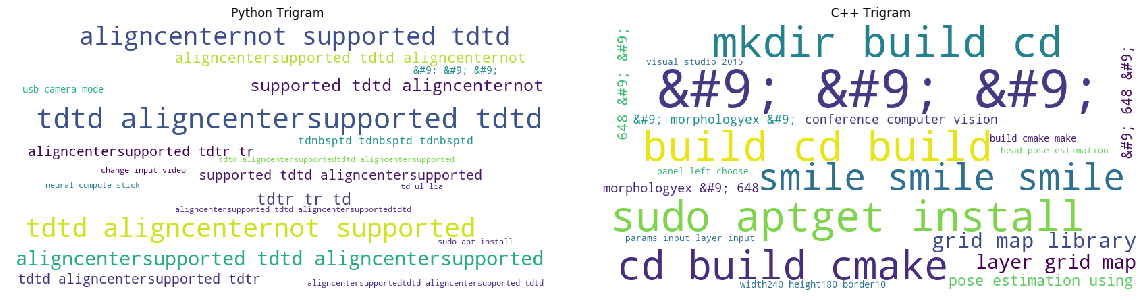

In [29]:
python_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in python_trigrams.to_dict().items()}
c_plus_plus_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in c_plus_plus_trigrams.to_dict().items()}

python_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(python_tridata)

c_plus_plus_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(c_plus_plus_tridata)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(python_trigram_cloud)
axs[1].imshow(c_plus_plus_trigram_cloud)

axs[0].set_title('Python Trigram')
axs[1].set_title('C++ Trigram')

for ax in axs: ax.axis('off')

### What does the distribution of IDFs look like for the most common words?

### Does the length of the README vary by programming language?   

In [30]:
train['doc_len'] = [len(x) for x in train.words]
validate['doc_len'] = [len(x) for x in validate.words]
test['doc_len'] = [len(x) for x in test.words]

In [31]:
train.groupby(train.language).doc_len.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
C++,45.0,322.111111,312.427462,7.0,103.0,198.0,374.0,1396.0
Python,63.0,511.253968,730.126701,5.0,98.5,251.0,549.5,3719.0


### Do different programming languages use a different number of unique words?

# Model

- Transform your documents into a form that can be used in a machine learning model. You should use the programming language of the repository as the label to predict.  


- Try fitting several different models and using several different representations of the text (e.g. a simple bag of words, then also the TF-IDF values for each).   


- Build a function that will take in the text of a README file, and tries to predict the programming language.  

In [32]:
# We need to have a baseline to compare to
train.language.value_counts()

Python    63
C++       45
Name: language, dtype: int64

### Bag of Words

### TF-IDF

## Conclusions/Takeaways

- Even though OpenCV is primarly written in C++, most words repos are written in Python  



- Repo Languages (out of 150 total most starred repos explored):  
    - Python 42.3% ; 61 repos  
    - C++ 32.6%, 47 repos  
    - Java 4.8%, 7 repos  
    
   
- We choose to only explore Python and C++ repos because there are the most significant   



- Combined total of 108 repos explored



- Most common words for Python and C++ combined are  &#9 ; , image, and opencv  



- Curious to know the meaning behind  &#9 ; ,could not find anything over it through Google search